In [12]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b2/10/388c4a697275417a6974033e6ea7235d61e648e6c39d9cc06fcc6a6f71d4/dash-2.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import koreanize_matplotlib

okt = Okt()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df = pd.read_csv('csv/test.csv')

In [52]:
df

c_date  keyword                ID      p_date                  user  \
0    2024-02-29  Java Ï∑®ÏóÖ   789248659683254  2024-02-27         yj_0518517887   
1    2024-02-29  Java Ï∑®ÏóÖ   405056675541148  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
2    2024-02-29  Java Ï∑®ÏóÖ   367413382763530  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
3    2024-02-29  Java Ï∑®ÏóÖ   763497902047623  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
4    2024-02-29  Java Ï∑®ÏóÖ  1176516517088600  2024-02-22        Ï∫†Ìéë - ÎåÄÌïôÏÉù ÌïÑÏàò Ï†ïÎ≥¥   
..          ...      ...               ...         ...                   ...   
733  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   799711781775527  2023-06-29             Íµ≠Ï†úÏª¥Ìì®ÌÑ∞ÏïÑÏπ¥Îç∞ÎØ∏   
734  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   730607098663031  2023-03-15      Ïª¥Ìè¨Ìä∏Îû© Comfort Lab   
735  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   757722275922119  2023-01-25        ÎûúÎìúÎ∂Å - Landbook   
736  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   696057065325275  2023-01-25        ÎûúÎìúÎ∂Å - Landbook   
737  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞  1286490288197189  2019-05-29                  Î°úÎòêÏò§ÏÖò   

                                              contents  
0    üî•Ï∑®ÏóÖÎ•† ÎÜíÏùÄ Ï∑®ÏóÖÏú†ÎßùÏßÅÏ¢Ö!\n\nÏ†ÑÏï°Î¨¥Î£åÏóê Îß§Ïõî ÍµêÏú°ÏàòÎãπÍπåÏßÄ Î∞õÏùÑ Ïàò ÏûàÎã§Í≥†?üî•\...  
1    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...  
2    üôé‚Äç‚ôÇÔ∏èÎ∞±ÏóîÎìú Î∞∞Ïö∞Î©¥ Ïñ¥Îîî Ï∑®ÏóÖ Í∞ÄÎä•Ìï¥Ïöî?\nüôã‚Äç‚ôÄÔ∏èÏ†ïÎãµ! Í∞úÎ∞úÏù¥ ÌïÑÏöîÌïú Î™®Îì† Î∂ÑÏïº...  
3    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...  
4    2024ÎÖÑ Ï∑®ÏóÖÍ∞ÄÎä•! Ìï≠Í≥µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ¨∏Í∞Ä ÏñëÏÑ±Í≥ºÏ†ï\nüíª7Í∏∞ ÏÑ†Ï∞©Ïàú Î™®ÏßëÏ§ë\n\n_2...  
..                                                 ...  
733  Ï∑®ÏóÖ Í≥†ÎØºÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÎì§ Î™®Îëê Íµ≠ÎπÑÏßÄÏõê Î∞õÍ≥† ÏàòÏóÖÎ∞õÏûêüòç\nÍµêÏú°ÎπÑ ÏµúÎåÄ 100% Íµ≠...  
734  Ïä§Ìè¨Ï∏†Î∏åÎùº ÏûÖÍ≥†, Î≤óÍ∏∞ Ïñ¥Î†µÎã§Îäî Ìé∏Í≤¨ÏùÄ no!\nÏïûÏßÄÌçºÌòï Î∏åÎùºÎ°ú ÏûÖÍ≥† Î≤óÍ∏∞ 1Ï¥àüëç\...  
735  ÎûúÎìúÎ∂ÅÏóêÏÑú ÌÜ†ÏßÄ Ï†ÅÏ†ïÍ∞ÄÍ≤© ÌôïÏù∏ÌïòÍ≥† ÏàòÏùµÏÑ±ÍπåÏßÄ Î∂ÑÏÑùÌïòÏÑ∏Ïöîüìà\n\n‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ...  
736  ‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÏπòÎ•º Ïûò Î™®Î•∏Îã§Î©¥?\n‚úÖÏàòÏùµÏÑ± ÎÜíÏùÄ Î∂ÄÎèôÏÇ∞ Îß§Î¨ºÏùÑ Ï∞æÍ≥†...  
737  Î°úÎòê ÏïÑÏßÅÎèÑ Ïö¥Ïóê Îß°Í∏∞ÏãúÎÇòÏöî?\nÎ∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï†ÅÏö©Ìï¥ Ï°∞Ìï©Ìïú Î≤àÌò∏Ï°∞Ìï©\nÎ¨¥Î£åÎ°ú Î∞õ...  

[738 rows x 6 columns]

In [53]:
import re

def remove_special_characters(text):
    # Ïù¥Î™®Ìã∞ÏΩò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞Î•º ÏúÑÌïú Ï†ïÍ∑úÌëúÌòÑÏãù
    pattern = r'[^a-zA-Z0-9Í∞Ä-Ìû£\s]'  # ÏòÅÎ¨∏, ÌïúÍ∏Ä, Ïà´Ïûê, Í≥µÎ∞±Îßå ÌóàÏö©

    # Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# 'ÎÇ¥Ïö©' Ïó¥Ïùò Í∞Å ÌñâÏóê ÎåÄÌï¥ Ïù¥Î™®Ìã∞ÏΩòÍ≥º ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
df['contents_sentense'] = df['contents'].dropna().apply(remove_special_characters)

In [57]:
df[['contents','contents_sentense']]

contents  \
0    üî•Ï∑®ÏóÖÎ•† ÎÜíÏùÄ Ï∑®ÏóÖÏú†ÎßùÏßÅÏ¢Ö!\n\nÏ†ÑÏï°Î¨¥Î£åÏóê Îß§Ïõî ÍµêÏú°ÏàòÎãπÍπåÏßÄ Î∞õÏùÑ Ïàò ÏûàÎã§Í≥†?üî•\...   
1    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...   
2    üôé‚Äç‚ôÇÔ∏èÎ∞±ÏóîÎìú Î∞∞Ïö∞Î©¥ Ïñ¥Îîî Ï∑®ÏóÖ Í∞ÄÎä•Ìï¥Ïöî?\nüôã‚Äç‚ôÄÔ∏èÏ†ïÎãµ! Í∞úÎ∞úÏù¥ ÌïÑÏöîÌïú Î™®Îì† Î∂ÑÏïº...   
3    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...   
4    2024ÎÖÑ Ï∑®ÏóÖÍ∞ÄÎä•! Ìï≠Í≥µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ¨∏Í∞Ä ÏñëÏÑ±Í≥ºÏ†ï\nüíª7Í∏∞ ÏÑ†Ï∞©Ïàú Î™®ÏßëÏ§ë\n\n_2...   
..                                                 ...   
733  Ï∑®ÏóÖ Í≥†ÎØºÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÎì§ Î™®Îëê Íµ≠ÎπÑÏßÄÏõê Î∞õÍ≥† ÏàòÏóÖÎ∞õÏûêüòç\nÍµêÏú°ÎπÑ ÏµúÎåÄ 100% Íµ≠...   
734  Ïä§Ìè¨Ï∏†Î∏åÎùº ÏûÖÍ≥†, Î≤óÍ∏∞ Ïñ¥Î†µÎã§Îäî Ìé∏Í≤¨ÏùÄ no!\nÏïûÏßÄÌçºÌòï Î∏åÎùºÎ°ú ÏûÖÍ≥† Î≤óÍ∏∞ 1Ï¥àüëç\...   
735  ÎûúÎìúÎ∂ÅÏóêÏÑú ÌÜ†ÏßÄ Ï†ÅÏ†ïÍ∞ÄÍ≤© ÌôïÏù∏ÌïòÍ≥† ÏàòÏùµÏÑ±ÍπåÏßÄ Î∂ÑÏÑùÌïòÏÑ∏Ïöîüìà\n\n‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ...   
736  ‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÏπòÎ•º Ïûò Î™®Î•∏Îã§Î©¥?\n‚úÖÏàòÏùµÏÑ± ÎÜíÏùÄ Î∂ÄÎèôÏÇ∞ Îß§Î¨ºÏùÑ Ï∞æÍ≥†...   
737  Î°úÎòê ÏïÑÏßÅÎèÑ Ïö¥Ïóê Îß°Í∏∞ÏãúÎÇòÏöî?\nÎ∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï†ÅÏö©Ìï¥ Ï°∞Ìï©Ìïú Î≤àÌò∏Ï°∞Ìï©\nÎ¨¥Î£åÎ°ú Î∞õ...   

                                     contents_sentense  
0    Ï∑®ÏóÖÎ•† ÎÜíÏùÄ Ï∑®ÏóÖÏú†ÎßùÏßÅÏ¢Ö\n\nÏ†ÑÏï°Î¨¥Î£åÏóê Îß§Ïõî ÍµêÏú°ÏàòÎãπÍπåÏßÄ Î∞õÏùÑ Ïàò ÏûàÎã§Í≥†\n\nÏ†Ñ...  
1    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§\nÏö∞Ïàò Î≤§Ï≤òÏä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ Í∏∞...  
2    Î∞±ÏóîÎìú Î∞∞Ïö∞Î©¥ Ïñ¥Îîî Ï∑®ÏóÖ Í∞ÄÎä•Ìï¥Ïöî\nÏ†ïÎãµ Í∞úÎ∞úÏù¥ ÌïÑÏöîÌïú Î™®Îì† Î∂ÑÏïº\n\nÏÇºÏÑ± Ï≤≠ÎÖÑ ...  
3    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§\nÏö∞Ïàò Î≤§Ï≤òÏä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ Í∏∞...  
4    2024ÎÖÑ Ï∑®ÏóÖÍ∞ÄÎä• Ìï≠Í≥µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ¨∏Í∞Ä ÏñëÏÑ±Í≥ºÏ†ï\n7Í∏∞ ÏÑ†Ï∞©Ïàú Î™®ÏßëÏ§ë\n\n24ÎÖÑ ...  
..                                                 ...  
733  Ï∑®ÏóÖ Í≥†ÎØºÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÎì§ Î™®Îëê Íµ≠ÎπÑÏßÄÏõê Î∞õÍ≥† ÏàòÏóÖÎ∞õÏûê\nÍµêÏú°ÎπÑ ÏµúÎåÄ 100 Íµ≠ÎπÑÏßÄ...  
734  Ïä§Ìè¨Ï∏†Î∏åÎùº ÏûÖÍ≥† Î≤óÍ∏∞ Ïñ¥Î†µÎã§Îäî Ìé∏Í≤¨ÏùÄ no\nÏïûÏßÄÌçºÌòï Î∏åÎùºÎ°ú ÏûÖÍ≥† Î≤óÍ∏∞ 1Ï¥à\n\n...  
735  ÎûúÎìúÎ∂ÅÏóêÏÑú ÌÜ†ÏßÄ Ï†ÅÏ†ïÍ∞ÄÍ≤© ÌôïÏù∏ÌïòÍ≥† ÏàòÏùµÏÑ±ÍπåÏßÄ Î∂ÑÏÑùÌïòÏÑ∏Ïöî\n\nÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäî...  
736  Î∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÏπòÎ•º Ïûò Î™®Î•∏Îã§Î©¥\nÏàòÏùµÏÑ± ÎÜíÏùÄ Î∂ÄÎèôÏÇ∞ Îß§Î¨ºÏùÑ Ï∞æÍ≥† ÏûàÎã§...  
737  Î°úÎòê ÏïÑÏßÅÎèÑ Ïö¥Ïóê Îß°Í∏∞ÏãúÎÇòÏöî\nÎ∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï†ÅÏö©Ìï¥ Ï°∞Ìï©Ìïú Î≤àÌò∏Ï°∞Ìï©\nÎ¨¥Î£åÎ°ú Î∞õÏïÑÎ≥¥ÏÑ∏Ïöî  

[738 rows x 2 columns]

## Îã®Ïñ¥ ÎπàÎèÑÏàò

In [85]:
def extract_nouns(text):
    if text is not None and isinstance(text, str):
        nouns = okt.nouns(text)
        return nouns
    else:
        return []

def calculate_filtered_count(content_nouns):
    # content_nounsÏóêÏÑú Í∏∏Ïù¥Í∞Ä 2 Ïù¥ÏÉÅÏù∏ Î™ÖÏÇ¨Îì§Îßå ÌïÑÌÑ∞ÎßÅ
    filtered_nouns = [noun for noun in content_nouns if len(noun) >= 2]
    
    # Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
    filtered_count = Counter(filtered_nouns)
    
    return filtered_count    


# 'ÎÇ¥Ïö©'Ïó¥ÏóêÏÑú Î™ÖÏÇ¨ Ï∂îÏ∂ú
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in df['contents_sentense']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]

# Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
content_count = Counter(content_nouns)


# filtered_count Í≥ÑÏÇ∞
filtered_count = calculate_filtered_count(content_nouns)
# Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 15Í∞ú Î™ÖÏÇ¨ Ï∂îÏ∂ú 

top_content_nouns = filtered_count.most_common(15)

# Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 50Í∞ú Î™ÖÏÇ¨ Ï∂îÏ∂ú 
top_filtered_nouns = filtered_count.most_common(50)

df['nouns'] = df['contents'].apply(extract_nouns)

In [86]:
top_filtered_nouns

[('Ï∑®ÏóÖ', 1773),
 ('Í∞úÎ∞úÏûê', 629),
 ('ÍµêÏú°', 565),
 ('Ïä§Ïø®', 526),
 ('ÏßÄÏõê', 517),
 ('Îç∞Ïù¥ÌÑ∞', 502),
 ('Î∂ÑÏÑù', 444),
 ('Î∞±ÏóîÎìú', 415),
 ('Î¨¥Î£å', 335),
 ('Ï§ÄÎπÑ', 304),
 ('Î∂ÄÌä∏Ï∫†ÌîÑ', 295),
 ('ÌîÑÎ°úÏ†ùÌä∏', 290),
 ('Ìà¨Ïûê', 280),
 ('Íµ≠ÎπÑ', 266),
 ('Ìè¨Ìä∏Ìè¥Î¶¨Ïò§', 254),
 ('ÎπÖÎç∞Ïù¥ÌÑ∞', 251),
 ('ÏßÄÍ∏à', 249),
 ('Í∞úÎ∞ú', 244),
 ('ÏãúÏûë', 227),
 ('Î™®Ïßë', 224),
 ('ÏàòÍ∞ï', 219),
 ('ÌòÑÏßÅ', 219),
 ('Í∞ïÏùò', 212),
 ('Ï£ºÏãù', 206),
 ('Ïã§Î¨¥', 190),
 ('Ï†úÍ≥µ', 182),
 ('Ï£ºÎèÑ', 182),
 ('Í∏∞Ï¥à', 177),
 ('Í≥ºÏ†ï', 173),
 ('Ïª§Î¶¨ÌÅòÎüº', 173),
 ('ÌôïÏù∏', 163),
 ('ÏãúÏû•', 162),
 ('Ïã†Ï≤≠', 159),
 ('Ï†ÑÏï°', 152),
 ('ÎßàÍ∞ê', 148),
 ('ÌõàÎ†®', 146),
 ('Í∞úÏõî', 145),
 ('ÎßàÏºÄÌåÖ', 139),
 ('Í∞ÄÎä•', 138),
 ('Í∏∞ÏóÖ', 136),
 ('Ï†ÑÎ¨∏Í∞Ä', 134),
 ('Ï†úÎ°ú', 133),
 ('Î≤†Ïù¥Ïä§', 131),
 ('Ïó¨Îü¨Î∂Ñ', 127),
 ('ÏµúÎåÄ', 125),
 ('Ï†ÑÍ≥µÏûê', 125),
 ('ÏΩîÎî©', 125),
 ('Ïã¨Ìôî', 125),
 ('ÏÑúÎπÑÏä§', 124),
 ('ÌÖåÏä§Ìä∏', 123)]

In [61]:
df

c_date  keyword                ID      p_date                  user  \
0    2024-02-29  Java Ï∑®ÏóÖ   789248659683254  2024-02-27         yj_0518517887   
1    2024-02-29  Java Ï∑®ÏóÖ   405056675541148  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
2    2024-02-29  Java Ï∑®ÏóÖ   367413382763530  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
3    2024-02-29  Java Ï∑®ÏóÖ   763497902047623  2024-02-25  Î©ÄÌã∞Ïûá - Multicampus It   
4    2024-02-29  Java Ï∑®ÏóÖ  1176516517088600  2024-02-22        Ï∫†Ìéë - ÎåÄÌïôÏÉù ÌïÑÏàò Ï†ïÎ≥¥   
..          ...      ...               ...         ...                   ...   
733  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   799711781775527  2023-06-29             Íµ≠Ï†úÏª¥Ìì®ÌÑ∞ÏïÑÏπ¥Îç∞ÎØ∏   
734  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   730607098663031  2023-03-15      Ïª¥Ìè¨Ìä∏Îû© Comfort Lab   
735  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   757722275922119  2023-01-25        ÎûúÎìúÎ∂Å - Landbook   
736  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞   696057065325275  2023-01-25        ÎûúÎìúÎ∂Å - Landbook   
737  2024-02-29     ÎπÖÎç∞Ïù¥ÌÑ∞  1286490288197189  2019-05-29                  Î°úÎòêÏò§ÏÖò   

                                              contents  \
0    üî•Ï∑®ÏóÖÎ•† ÎÜíÏùÄ Ï∑®ÏóÖÏú†ÎßùÏßÅÏ¢Ö!\n\nÏ†ÑÏï°Î¨¥Î£åÏóê Îß§Ïõî ÍµêÏú°ÏàòÎãπÍπåÏßÄ Î∞õÏùÑ Ïàò ÏûàÎã§Í≥†?üî•\...   
1    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...   
2    üôé‚Äç‚ôÇÔ∏èÎ∞±ÏóîÎìú Î∞∞Ïö∞Î©¥ Ïñ¥Îîî Ï∑®ÏóÖ Í∞ÄÎä•Ìï¥Ïöî?\nüôã‚Äç‚ôÄÔ∏èÏ†ïÎãµ! Í∞úÎ∞úÏù¥ ÌïÑÏöîÌïú Î™®Îì† Î∂ÑÏïº...   
3    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.\nÏö∞Ïàò Î≤§Ï≤ò,Ïä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ...   
4    2024ÎÖÑ Ï∑®ÏóÖÍ∞ÄÎä•! Ìï≠Í≥µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ¨∏Í∞Ä ÏñëÏÑ±Í≥ºÏ†ï\nüíª7Í∏∞ ÏÑ†Ï∞©Ïàú Î™®ÏßëÏ§ë\n\n_2...   
..                                                 ...   
733  Ï∑®ÏóÖ Í≥†ÎØºÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÎì§ Î™®Îëê Íµ≠ÎπÑÏßÄÏõê Î∞õÍ≥† ÏàòÏóÖÎ∞õÏûêüòç\nÍµêÏú°ÎπÑ ÏµúÎåÄ 100% Íµ≠...   
734  Ïä§Ìè¨Ï∏†Î∏åÎùº ÏûÖÍ≥†, Î≤óÍ∏∞ Ïñ¥Î†µÎã§Îäî Ìé∏Í≤¨ÏùÄ no!\nÏïûÏßÄÌçºÌòï Î∏åÎùºÎ°ú ÏûÖÍ≥† Î≤óÍ∏∞ 1Ï¥àüëç\...   
735  ÎûúÎìúÎ∂ÅÏóêÏÑú ÌÜ†ÏßÄ Ï†ÅÏ†ïÍ∞ÄÍ≤© ÌôïÏù∏ÌïòÍ≥† ÏàòÏùµÏÑ±ÍπåÏßÄ Î∂ÑÏÑùÌïòÏÑ∏Ïöîüìà\n\n‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ...   
736  ‚úÖÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÏπòÎ•º Ïûò Î™®Î•∏Îã§Î©¥?\n‚úÖÏàòÏùµÏÑ± ÎÜíÏùÄ Î∂ÄÎèôÏÇ∞ Îß§Î¨ºÏùÑ Ï∞æÍ≥†...   
737  Î°úÎòê ÏïÑÏßÅÎèÑ Ïö¥Ïóê Îß°Í∏∞ÏãúÎÇòÏöî?\nÎ∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï†ÅÏö©Ìï¥ Ï°∞Ìï©Ìïú Î≤àÌò∏Ï°∞Ìï©\nÎ¨¥Î£åÎ°ú Î∞õ...   

                                     contents_sentense  \
0    Ï∑®ÏóÖÎ•† ÎÜíÏùÄ Ï∑®ÏóÖÏú†ÎßùÏßÅÏ¢Ö\n\nÏ†ÑÏï°Î¨¥Î£åÏóê Îß§Ïõî ÍµêÏú°ÏàòÎãπÍπåÏßÄ Î∞õÏùÑ Ïàò ÏûàÎã§Í≥†\n\nÏ†Ñ...   
1    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§\nÏö∞Ïàò Î≤§Ï≤òÏä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ Í∏∞...   
2    Î∞±ÏóîÎìú Î∞∞Ïö∞Î©¥ Ïñ¥Îîî Ï∑®ÏóÖ Í∞ÄÎä•Ìï¥Ïöî\nÏ†ïÎãµ Í∞úÎ∞úÏù¥ ÌïÑÏöîÌïú Î™®Îì† Î∂ÑÏïº\n\nÏÇºÏÑ± Ï≤≠ÎÖÑ ...   
3    Î©ÄÌã∞ÏûáÏùÄ Ï±ÑÏö©ÏùÑ Î™©Ï†ÅÏúºÎ°ú ÍµêÏú°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§\nÏö∞Ïàò Î≤§Ï≤òÏä§ÌÉÄÌä∏ÏóÖ Í∏∞ÏóÖ Ïó∞Í≥ÑÎ°ú Ï∑®ÏóÖ Í∏∞...   
4    2024ÎÖÑ Ï∑®ÏóÖÍ∞ÄÎä• Ìï≠Í≥µ Îç∞Ïù¥ÌÑ∞ Ï†ÑÎ¨∏Í∞Ä ÏñëÏÑ±Í≥ºÏ†ï\n7Í∏∞ ÏÑ†Ï∞©Ïàú Î™®ÏßëÏ§ë\n\n24ÎÖÑ ...   
..                                                 ...   
733  Ï∑®ÏóÖ Í≥†ÎØºÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÎì§ Î™®Îëê Íµ≠ÎπÑÏßÄÏõê Î∞õÍ≥† ÏàòÏóÖÎ∞õÏûê\nÍµêÏú°ÎπÑ ÏµúÎåÄ 100 Íµ≠ÎπÑÏßÄ...   
734  Ïä§Ìè¨Ï∏†Î∏åÎùº ÏûÖÍ≥† Î≤óÍ∏∞ Ïñ¥Î†µÎã§Îäî Ìé∏Í≤¨ÏùÄ no\nÏïûÏßÄÌçºÌòï Î∏åÎùºÎ°ú ÏûÖÍ≥† Î≤óÍ∏∞ 1Ï¥à\n\n...   
735  ÎûúÎìúÎ∂ÅÏóêÏÑú ÌÜ†ÏßÄ Ï†ÅÏ†ïÍ∞ÄÍ≤© ÌôïÏù∏ÌïòÍ≥† ÏàòÏùµÏÑ±ÍπåÏßÄ Î∂ÑÏÑùÌïòÏÑ∏Ïöî\n\nÎ∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäî...   
736  Î∂ÄÎèôÏÇ∞ÏùÑ ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÎç∞ Í∞ÄÏπòÎ•º Ïûò Î™®Î•∏Îã§Î©¥\nÏàòÏùµÏÑ± ÎÜíÏùÄ Î∂ÄÎèôÏÇ∞ Îß§Î¨ºÏùÑ Ï∞æÍ≥† ÏûàÎã§...   
737  Î°úÎòê ÏïÑÏßÅÎèÑ Ïö¥Ïóê Îß°Í∏∞ÏãúÎÇòÏöî\nÎ∂ÑÏÑù ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï†ÅÏö©Ìï¥ Ï°∞Ìï©Ìïú Î≤àÌò∏Ï°∞Ìï©\nÎ¨¥Î£åÎ°ú Î∞õÏïÑÎ≥¥ÏÑ∏Ïöî   

                                                 nouns  
0    [Ï∑®ÏóÖÎ•†, Ï∑®ÏóÖ, Ïú†Îßù, ÏßÅÏ¢Ö, Ï†ÑÏï°, Î¨¥Î£å, Îß§Ïõî, ÍµêÏú°, ÏàòÎãπ, Ïàò, Ï†ÑÏï°, Íµ≠...  
1    [Î©ÄÌã∞, Ï±ÑÏö©, Î™©Ï†Å, ÍµêÏú°, ÏßÑÌñâ, Ïö∞Ïàò, Ï≤ò, Ïä§

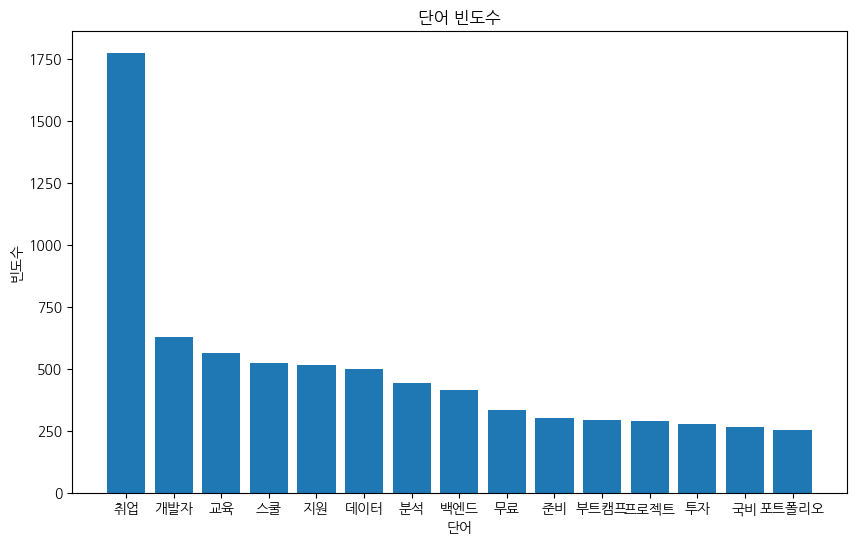

In [88]:
words, frequencies = zip(*top_content_nouns)

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.title('Îã®Ïñ¥ ÎπàÎèÑÏàò')
plt.xlabel('Îã®Ïñ¥')
plt.ylabel('ÎπàÎèÑÏàò')
plt.show()


# ÎåÄÏâ¨ ÏãúÍ∞ÅÌôî

In [91]:
# import plotly.express as px
# from dash import Dash, dcc, html

# import pandas as pd

# # Ïï± Ï¥àÍ∏∞Ìôî
# app = Dash(__name__)

# # Î†àÏù¥ÏïÑÏõÉ Ï†ïÏùò
# app.layout = html.Div([
#     html.H1("Top 10 Nouns Frequency"),
#     dcc.Graph(
#         id='bar-chart',
#         figure={
#             'data': [
#                 {'x': [word for word, _ in top_filtered_nouns], 'y': [freq for _, freq in top_filtered_nouns], 'type': 'bar', 'name': 'Frequency'},
#             ],
#             'layout': {
#                 'title': 'Top 10 Nouns Frequency',
#                 'xaxis': {'title': 'Nouns'},
#                 'yaxis': {'title': 'Frequency'}
#             }
#         }
#     )
# ])

# # Ïï± Ïã§Ìñâ
# if __name__ == '__main__':
#     app.run_server(debug=True)

## Wordcloud 

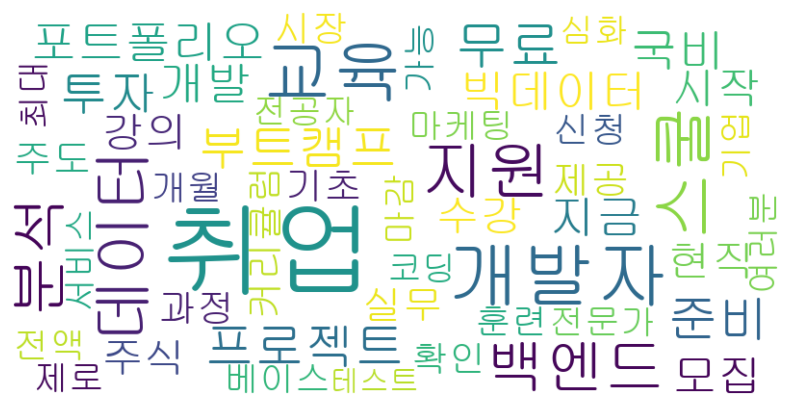

In [90]:
from wordcloud import WordCloud
font_path='C:/Windows/Fonts/NGULIM.ttf'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,  # ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
).generate_from_frequencies(dict(top_filtered_nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()